## Exploring Healthcare Insights and Outcomes in Critical Care Patients Data
### Exploratory Data Analysis (Work in progress)
##### Project Author: Bruno Ferreira    
##### Date: April 2024

In this notebook, we will focus on uncovering hidden healthcare trends and patterns by analyzing the `mimic_iv` dataframe, that comprises patient data from Beth Israel Deaconess Medical Center's electronic health records (EHRs) (Sample of 100 patients admitted to emergency departments and intensive care units).

##### Goals
- Uncover hidden insights and trends in critical care patient data.
- Identify key factors influencing healthcare outcomes.
- Explore relationships between patient characteristics and medical outcomes.

##### Loading our previously cleaned and processed main data frame (see "Data Cleaning & Preparation Notebook" on GitHub):

In [1]:
import pandas as pd

file_path = r'C:\Users\bruno\Desktop\mimic\mimiciv.csv' 
mimic_iv = pd.read_csv(file_path) 
mimic_iv.head() # Dataframe's first 5 rows

,subject_id,race,last_stay,avg_stay,total_admissions,admission_type,gender,age,total_diagnoses,blood_disorders,...,respiratory_disorders,skin_disorders,procedures_count,prescriptions_count,bmi_index,systolic_bp,diastolic_bp,abnorm_labresults_ratio,1yr_death,deceased
0,10000032,WHITE,1.8,1.4,4,EMERGENCY,F,52,32,0,...,1,0,3.0,81,18.2,98.0,66.0,0.546,1,0
1,10001217,WHITE,5.9,6.4,2,EMERGENCY,F,55,15,0,...,1,0,4.0,94,24.3,134.0,84.0,0.123,0,0
2,10001725,WHITE,3.0,3.0,1,EMERGENCY,F,46,16,0,...,0,0,3.0,70,26.5,114.0,70.0,0.088,0,0
3,10002428,WHITE,0.8,5.6,7,OBSERVATION,F,80,99,1,...,1,0,17.0,320,18.2,110.0,70.0,0.365,0,0
4,10002495,OTHER,6.9,6.9,1,EMERGENCY,M,81,15,0,...,0,0,7.0,113,25.8,159.0,59.0,0.453,0,0


##### Features Description

- `subject_id`: Unique identifier for each patient.
- `race`: The patient's race/ethnicity.
- `last_stay`: Duration (in days) of the last hospital stay.
- `avg_stay`: Average duration (in days) of hospital stays.
- `total_admissions`: Total number of hospital admissions for the patient.
- `total_diagnoses`: Total number of diagnosed conditions.
- `gender`: Gender of the patient.
- `age`: Last age recorded for the patient.
- `infectious_diseases`: Binary indicator (0 or 1) for diagnosis of infec.tious diseases (1 = patient had such a diagnosis within their 10 most recent diagnoses, valid for all binary features involving health conditions)
- `cancer`: Binary indicator (0 or 1) for diagnosis of cancer.
- `endocrine_disorders`: Binary indicator (0 or 1) for diagnosis of endocrine disorders.
- `blood_disorders`: Binary indicator (0 or 1) for diagnosis of blood disorders.
- `mental_disorders`: Binary indicator (0 or 1) for diagnosis of mental disorders.
- `nervous_disorders`: Binary indicator (0 or 1) for diagnosis of nervous system disorders.
- `cardiovascular_disorders`: Binary indicator (0 or 1) for diagnosis of cardiovascular disorders.
- `respiratory_disorders`: Binary indicator (0 or 1) for diagnosis of respiratory disorders.
- `digestive_disorders`: Binary indicator (0 or 1) for diagnosis of digestive disorders.
- `genitourinary_disorders`: Binary indicator (0 or 1) for diagnosis of genitourinary disorders.
- `pregnancy_complications`: Binary indicator (0 or 1) for diagnosis of pregnancy complications.
- `skin_disorders`: Binary indicator (0 or 1) for diagnosis of skin disorders.
- `musculoskeletal_disorders`: Binary indicator (0 or 1) for diagnosis of musculoskeletal disorders.
- `injuries_&_poisonings`: Binary indicator (0 or 1) for diagnosis of injuries or poisonings.
- `procedures_count`: Number of medical procedures undergone.
- `prescriptions_count`: Number of prescriptions given.
- `bmi_index`: Body Mass Index (BMI) of the patient.
- `systolic_bp`: Systolic blood pressure reading.
- `diastolic_bp`: Diastolic blood pressure reading.
- `abnorm_labresults_ratio`: Ratio of abnormal lab results to total lab results.
- `admission_type`: Type of admission event.
- `1yr_death`: Binary indicator (0 or 1) for in-hospital death or within 1 year of last hospital discharge (0 if alive, 1 if deceased).
- `deceased`: Binary indicator (0 or 1) for in-hospital death only (0 if alive, 1 if deceased) 

##### Check column data types and number of rows and columns:

In [2]:
mimic_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 100 non-null    int64  
 1   race                       100 non-null    object 
 2   last_stay                  100 non-null    float64
 3   avg_stay                   100 non-null    float64
 4   total_admissions           100 non-null    int64  
 5   admission_type             100 non-null    object 
 6   gender                     100 non-null    object 
 7   age                        100 non-null    int64  
 8   total_diagnoses            100 non-null    int64  
 9   blood_disorders            100 non-null    int64  
 10  cancer                     100 non-null    int64  
 11  cardiovascular_disorders   100 non-null    int64  
 12  digestive_disorders        100 non-null    int64  
 13  endocrine_disorders        100 non-null    int64  


- There are 100 entries (rows) and 30 columns (features). Column data types include 7 columns of type float64 (representing numerical values with decimals), 21 columns of type int64 (representing integer values), and 2 columns of type object (representing categorical data). Let's just fix 'procedures_count' so its values are integers.

In [64]:
# Round 'procedures_count' values to the nearest integer and convert to integer type
mimic_iv['procedures_count'] = mimic_iv['procedures_count'].round().astype(int)

#### 1. Data Overview and Summary Statistics

In [3]:
mimic_iv.describe(include='all') # See disease diagnoses columns in the cell below

,subject_id,race,last_stay,avg_stay,total_admissions,admission_type,gender,age,total_diagnoses,blood_disorders,...,respiratory_disorders,skin_disorders,procedures_count,prescriptions_count,bmi_index,systolic_bp,diastolic_bp,abnorm_labresults_ratio,1yr_death,deceased
count,1.000000e+02,100,100.000000,100.000000,100.0000,100,100,100.00000,100.000000,100.00000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
unique,NaN,4,NaN,NaN,NaN,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,WHITE,NaN,NaN,NaN,EMERGENCY,M,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,66,NaN,NaN,NaN,62,57,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.001878e+07,NaN,7.096000,7.205000,2.7500,NaN,NaN,61.75000,34.870000,0.43000,...,0.260000,0.120000,8.038957,180.87000,27.202606,129.002000,75.028571,0.361040,0.310000,0.15000
std,1.115115e+04,NaN,6.009503,4.695482,3.1794,NaN,NaN,16.16979,47.037843,0.49757,...,0.440844,0.326599,7.730103,193.48357,4.841833,16.688652,10.043932,0.110263,0.464823,0.35887
min,1.000003e+07,NaN,0.500000,1.400000,1.0000,NaN,NaN,21.00000,2.000000,0.00000,...,0.000000,0.000000,1.000000,18.00000,14.800000,90.000000,44.000000,0.088000,0.000000,0.00000
25%,1.000889e+07,NaN,3.000000,4.275000,1.0000,NaN,NaN,51.75000,9.000000,0.00000,...,0.000000,0.000000,2.000000,63.75000,24.450000,119.700000,70.000000,0.295750,0.000000,0.00000
50%,1.001909e+07,NaN,5.300000,5.850000,1.0000,NaN,NaN,63.00000,17.500000,0.00000,...,0.000000,0.000000,4.000000,109.00000,26.800000,128.200000,75.200000,0.354000,0.000000,0.00000
75%,1.002550e+07,NaN,8.675000,9.025000,3.0000,NaN,NaN,72.00000,36.000000,1.00000,...,1.000000,0.000000,10.500000,185.00000,29.850000,140.250000,80.400000,0.438250,1.000000,0.00000


In [4]:
# Descriptive statistics for disease diagnoses only (categories)
start = 'blood_disorders'
end = 'skin_disorders'
columns_range = mimic_iv.loc[:, start:end]
columns_range.describe()

,blood_disorders,cancer,cardiovascular_disorders,digestive_disorders,endocrine_disorders,genitourinary_disorders,infectious_diseases,injuries_&_poisonings,mental_disorders,musculoskeletal_disorders,nervous_disorders,other,respiratory_disorders,skin_disorders
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.43000,0.120000,0.710000,0.520000,0.820000,0.270000,0.21000,0.360000,0.45,0.300000,0.380000,0.340000,0.260000,0.120000
std,0.49757,0.326599,0.456048,0.502117,0.386123,0.446196,0.40936,0.482418,0.50,0.460566,0.487832,0.476095,0.440844,0.326599
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2. Patient Demographics

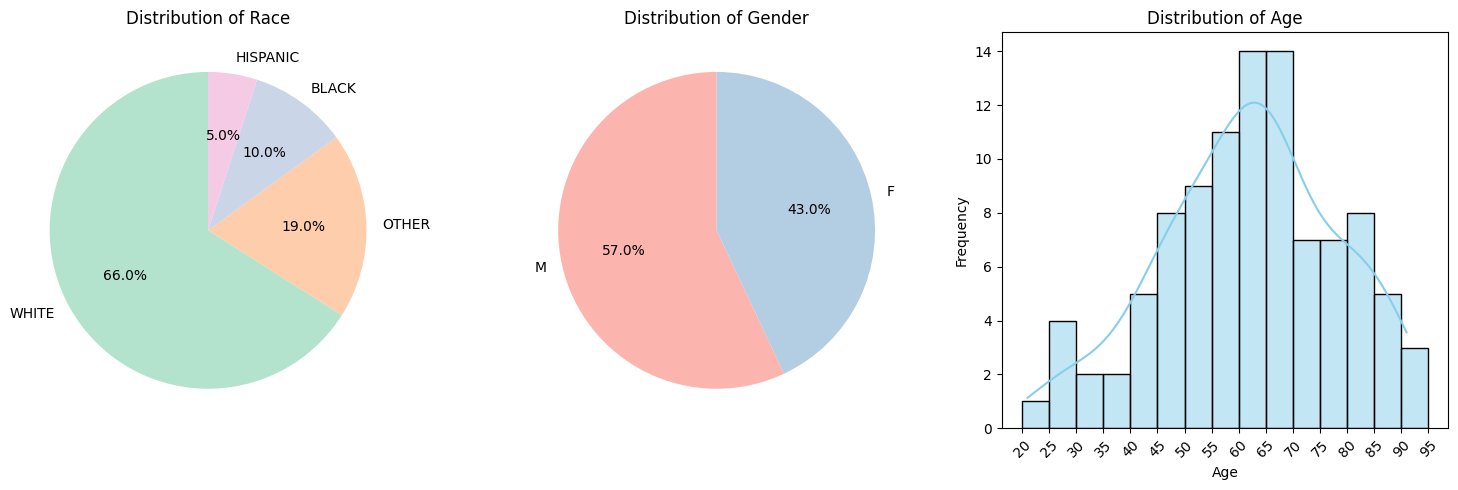

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with subplots for race, gender, and age distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting pie chart for 'race'
race_counts = mimic_iv['race'].value_counts()
axes[0].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'), startangle=90)
axes[0].set_title('Distribution of Race')

# Plotting pie chart for 'gender'
gender_counts = mimic_iv['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Pastel1'), startangle=90)
axes[1].set_title('Distribution of Gender')

# Plotting histogram for 'age' distribution with aligned bins and ticks
bin_edges = range(20, 100, 5)  # Specify bin edges with 5-year intervals
sns.histplot(mimic_iv['age'], bins=bin_edges, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Distribution of Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')

# Customize x-axis ticks to align with bin edges
axes[2].set_xticks(bin_edges)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### 3. Hospitalizations

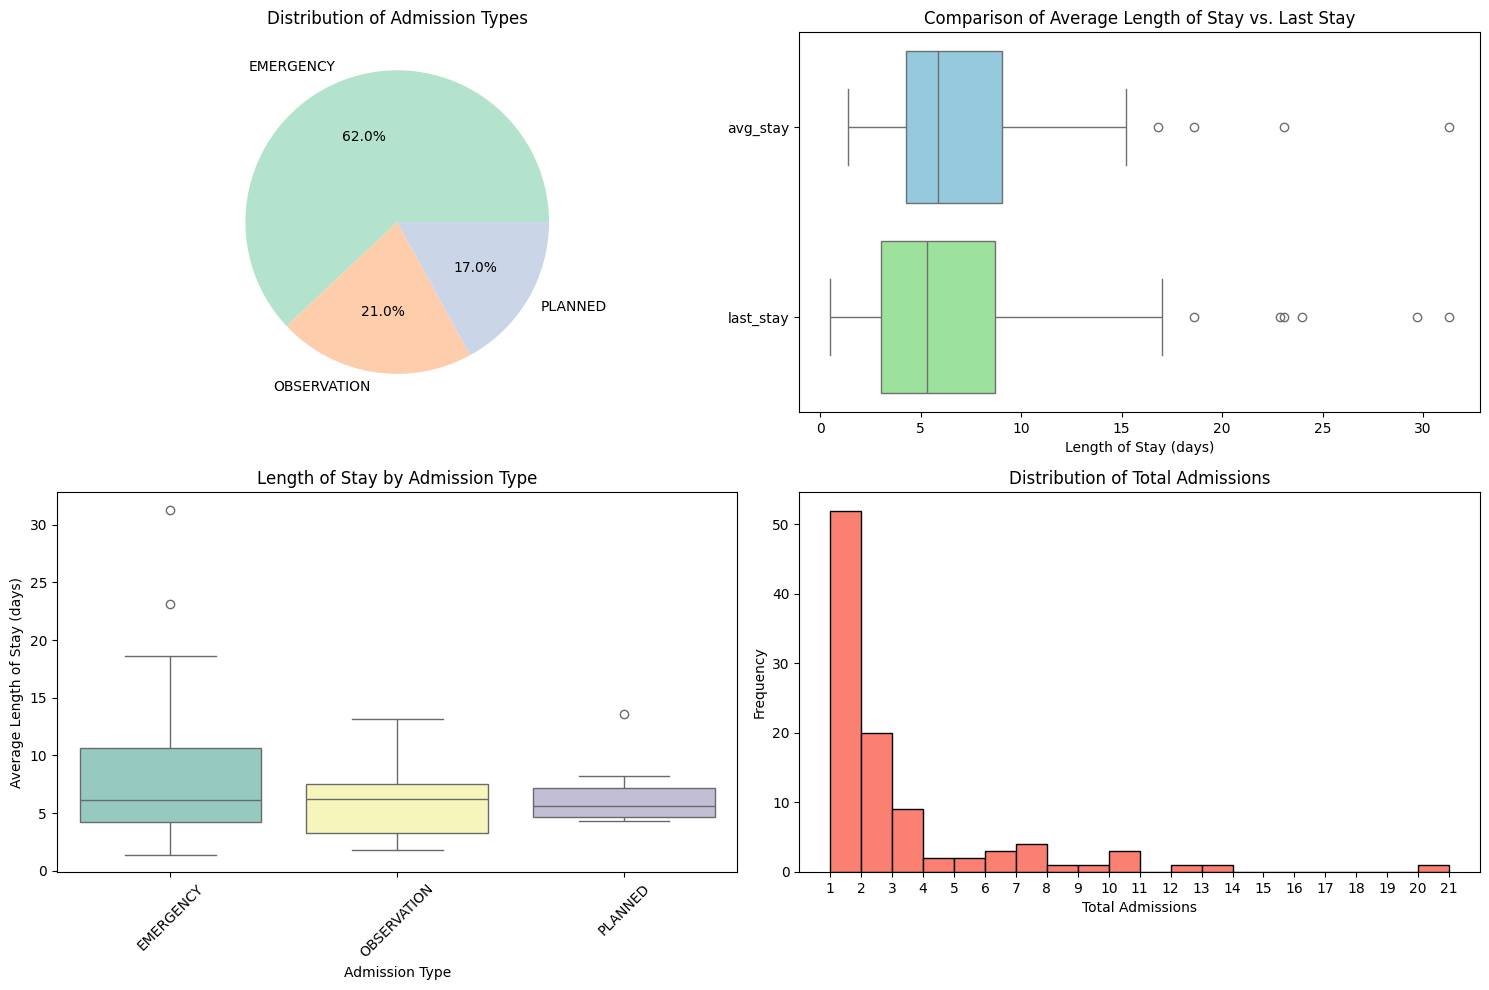

In [80]:
# Set up a figure with subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting Admission Type Distribution (as a pie chart)
admission_counts = mimic_iv['admission_type'].value_counts()
axes[0, 0].pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'))
axes[0, 0].set_title('Distribution of Admission Types')

# Horizontal Box Plot for Comparison of Average Length of Stay and Last Stay
sns.boxplot(data=mimic_iv[['avg_stay', 'last_stay']], orient='h', ax=axes[0, 1], palette=['skyblue', 'lightgreen'])
axes[0, 1].set_title('Comparison of Average Length of Stay vs. Last Stay')
axes[0, 1].set_xlabel('Length of Stay (days)')

# Additional Analysis: Length of Stay by Admission Type
sns.boxplot(x='admission_type', y='avg_stay', data=mimic_iv, hue='admission_type', palette='Set3', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Length of Stay by Admission Type')
axes[1, 0].set_xlabel('Admission Type')
axes[1, 0].set_ylabel('Average Length of Stay (days)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Histogram of Total Admissions (aligned with integer bins and ticks)
max_admissions = mimic_iv['total_admissions'].max()
bin_edges = range(1, int(max_admissions) + 2, 1)  # Define bin edges starting from 0 up to max_admissions + 1
axes[1, 1].hist(mimic_iv['total_admissions'], bins=bin_edges, color='salmon', edgecolor='black')
axes[1, 1].set_title('Distribution of Total Admissions')
axes[1, 1].set_xlabel('Total Admissions')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(bin_edges)  # Set x-axis tick locations to bin edges for integer values

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()

#### 4. Patient's medical history

##### Prevalence of Medical Conditions

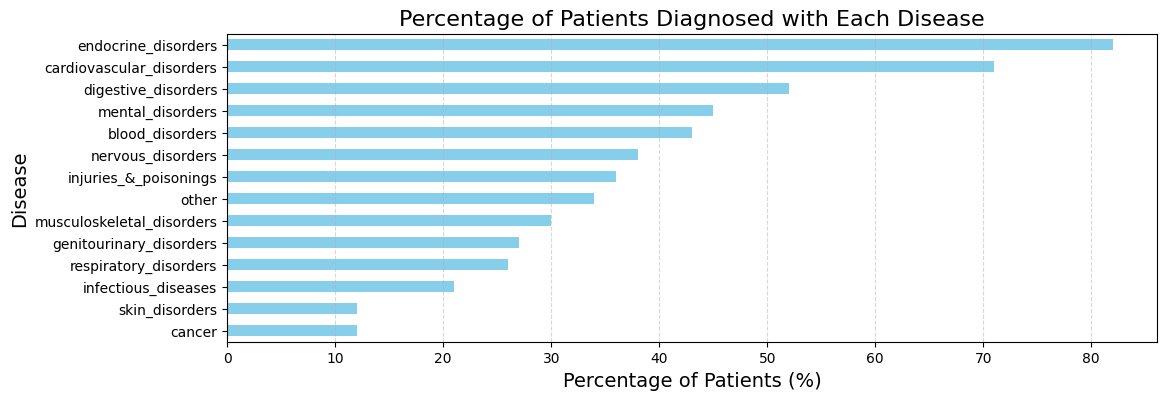

In [7]:
# Use iloc to select the disease indicator columns dynamically
start_index = mimic_iv.columns.get_loc('blood_disorders')
end_index = mimic_iv.columns.get_loc('skin_disorders') + 1  # Include last column

disease_columns = mimic_iv.columns[start_index:end_index]

# Calculate and plot the percentage of patients diagnosed with each disease
(mimic_iv[disease_columns].mean() * 100).sort_values().plot(kind='barh', figsize=(12, 4), color='skyblue')
plt.title('Percentage of Patients Diagnosed with Each Disease', fontsize=16)
plt.xlabel('Percentage of Patients (%)', fontsize=14)
plt.ylabel('Disease', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

##### Co-occurrences & Comorbidities

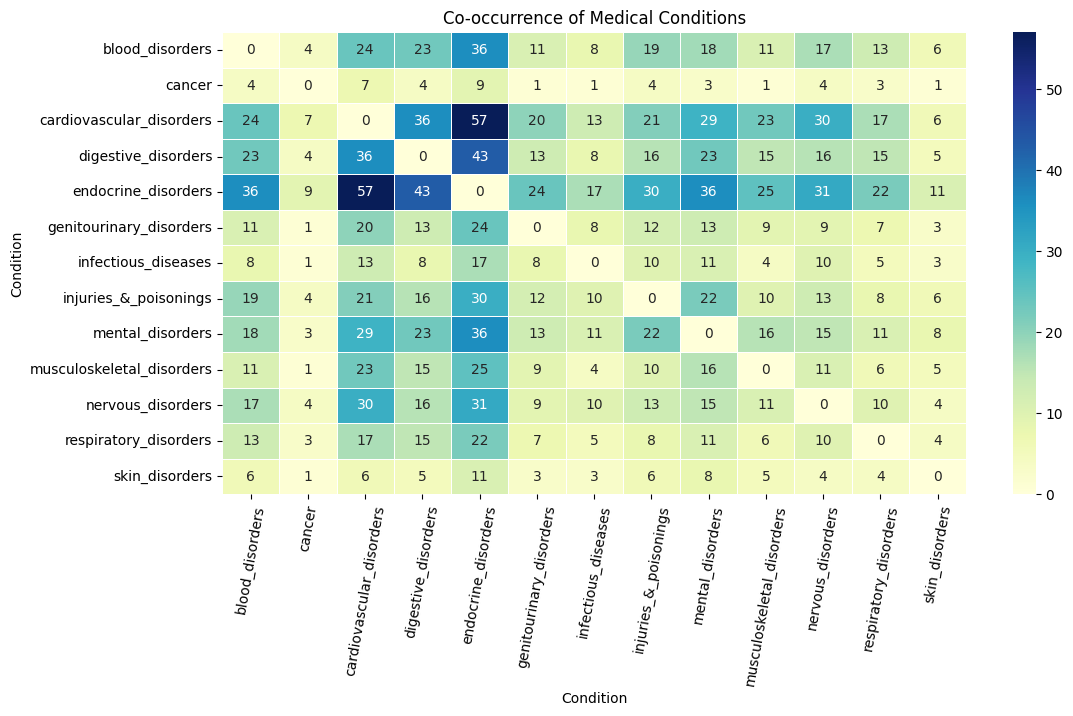

In [120]:
# List of medical condition columns
medical_conditions_columns = [ 'blood_disorders', 'cancer', 'cardiovascular_disorders', 'digestive_disorders', 'endocrine_disorders', 
                              'genitourinary_disorders', 'infectious_diseases', 'injuries_&_poisonings', 'mental_disorders', 
                              'musculoskeletal_disorders', 'nervous_disorders', 'respiratory_disorders', 'skin_disorders' ]

# Create a new DataFrame to hold co-occurrence counts
cooccurrence_df = pd.DataFrame(index=medical_conditions_columns, columns=medical_conditions_columns, data=0)

# Calculate pairwise co-occurrence counts
for col1 in medical_conditions_columns:
    for col2 in medical_conditions_columns:
        if col1 != col2:
            cooccurrence_df.loc[col1, col2] = ((mimic_iv[col1] == 1) & (mimic_iv[col2] == 1)).sum()

# Plotting Most Common Co-occurrences
plt.figure(figsize=(12, 6))
sns.heatmap(cooccurrence_df, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Co-occurrence of Medical Conditions')
plt.xlabel('Condition')
plt.ylabel('Condition')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.show()

#####  Distribution of Lab Results, Total Diagnoses, Procedures & Prescriptions

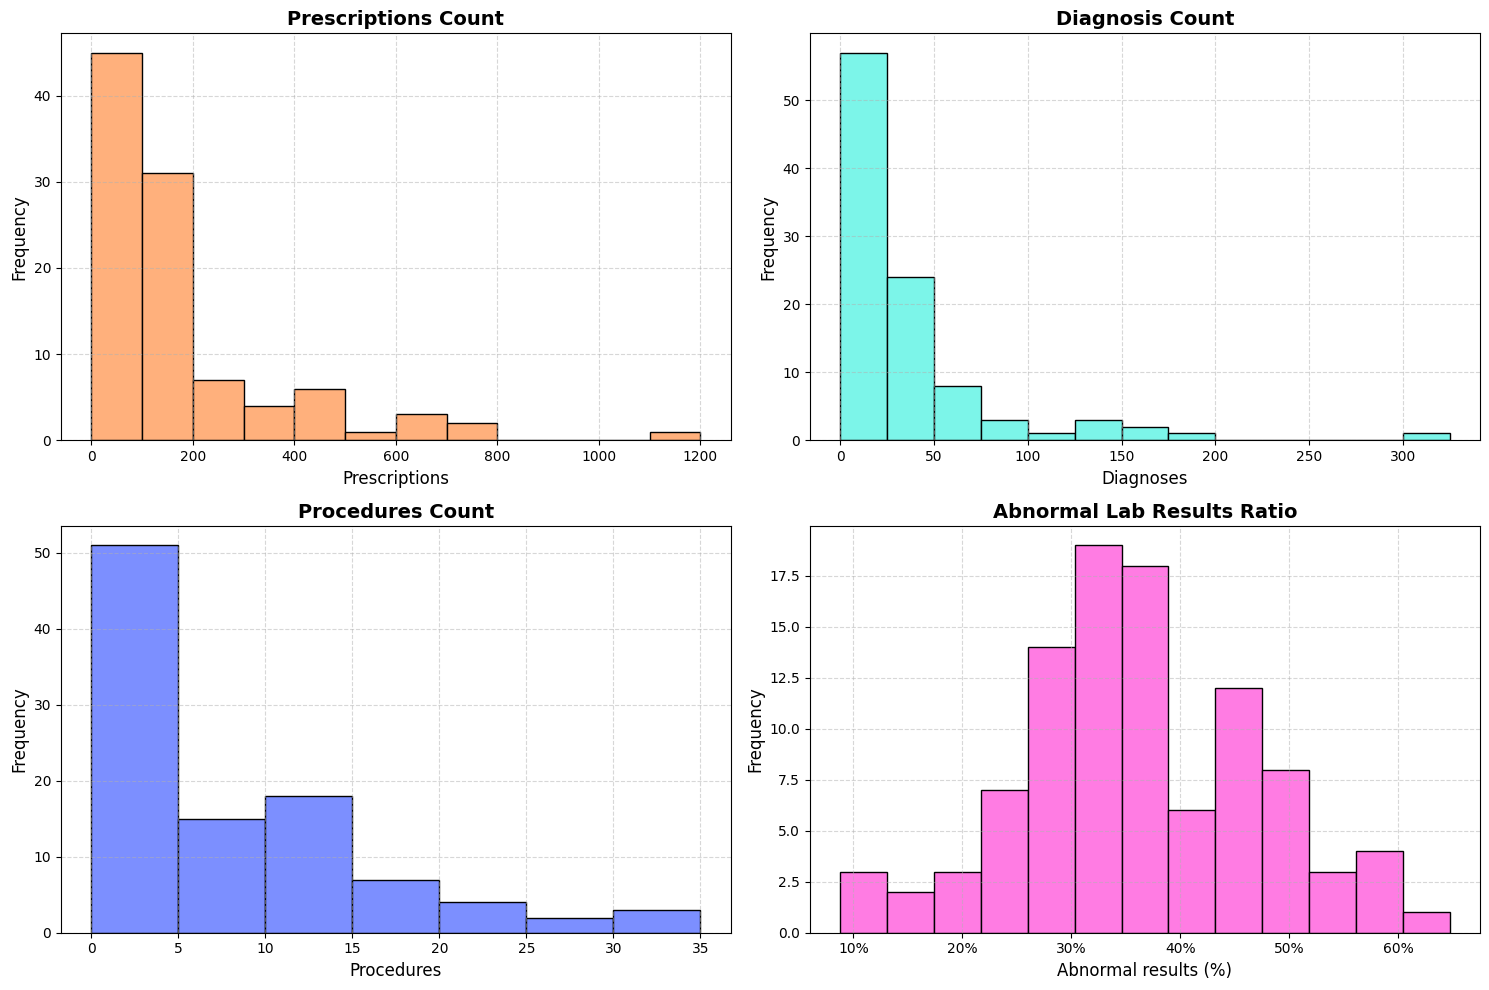

In [118]:
from matplotlib.ticker import FuncFormatter

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Define the histogram parameters
hist_params = [
    {'data': mimic_iv['prescriptions_count'], 'title': 'Prescriptions Count', 'xlabel': 'Prescriptions', 'bins': range(0, max(mimic_iv['prescriptions_count']) + 100, 100), 'color': '#FFB07C'},
    {'data': mimic_iv['total_diagnoses'], 'title': 'Diagnosis Count', 'xlabel': 'Diagnoses', 'bins': range(0, max(mimic_iv['total_diagnoses']) + 25, 25), 'color': '#7CF5E9'},
    {'data': mimic_iv['procedures_count'], 'title': 'Procedures Count', 'xlabel': 'Procedures', 'bins': range(0, max(mimic_iv['procedures_count']) + 5, 5), 'color': '#7C8FFF'},
    {'data': mimic_iv['abnorm_labresults_ratio'], 'title': 'Abnormal Lab Results Ratio', 'xlabel': 'Abnormal results (%)', 'bins': np.linspace(min(mimic_iv['abnorm_labresults_ratio']), max(mimic_iv['abnorm_labresults_ratio']), 14), 'color': '#FF7CE3'}
]

# Iterate over each subplot parameters and plot the histograms
for ax, params in zip(axes.flatten(), hist_params):
    ax.hist(params['data'], bins=params['bins'], color=params['color'], edgecolor='black')
    ax.set_title(params['title'], fontsize=14, fontweight='bold')
    ax.set_xlabel(params['xlabel'], fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Format x-axis tick labels as percentages for the 'Abnormal Lab Results Ratio' subplot
    if params['title'] == 'Abnormal Lab Results Ratio':
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()

#### 5. Common Health Metrics

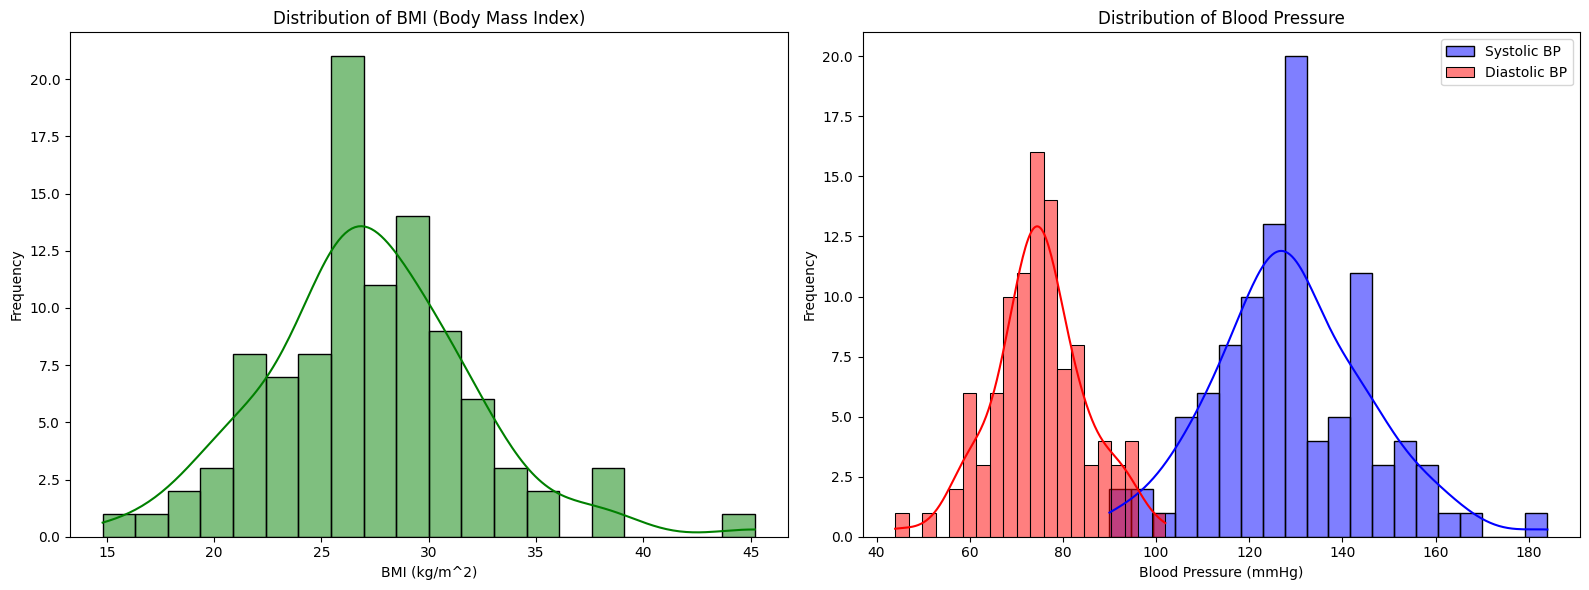

In [10]:
# Set up a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting BMI Distribution
sns.histplot(mimic_iv['bmi_index'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of BMI (Body Mass Index)')
axes[0].set_xlabel('BMI (kg/m^2)')
axes[0].set_ylabel('Frequency')

# Plotting Blood Pressure Distribution (Systolic and Diastolic)
sns.histplot(mimic_iv['systolic_bp'], bins=20, kde=True, color='blue', label='Systolic BP', ax=axes[1])
sns.histplot(mimic_iv['diastolic_bp'], bins=20, kde=True, color='red', label='Diastolic BP', ax=axes[1])
axes[1].set_title('Distribution of Blood Pressure')
axes[1].set_xlabel('Blood Pressure (mmHg)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### 6. Outcome Analysis

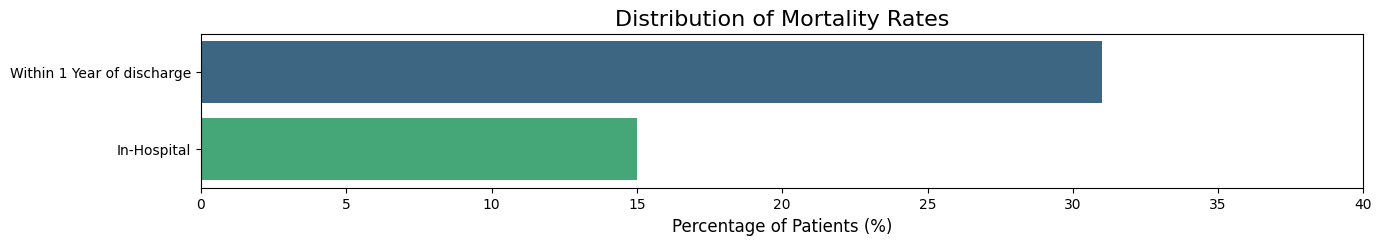

In [137]:
# Convert mortality rates to percentage
mortality_rates = {
    'Within 1 Year of discharge': mimic_iv['1yr_death'].mean() * 100,
    'In-Hospital': mimic_iv['deceased'].mean() * 100
}

# Plotting horizontal bar chart
plt.figure(figsize=(15, 2))
sns.barplot(x=list(mortality_rates.values()), y=list(mortality_rates.keys()), palette='viridis', orient='h')
plt.title('Distribution of Mortality Rates', fontsize=16)
plt.xlabel('Percentage of Patients (%)', fontsize=12)
plt.xlim(0, 40)  # Set x-axis limit for better visualization
plt.show()

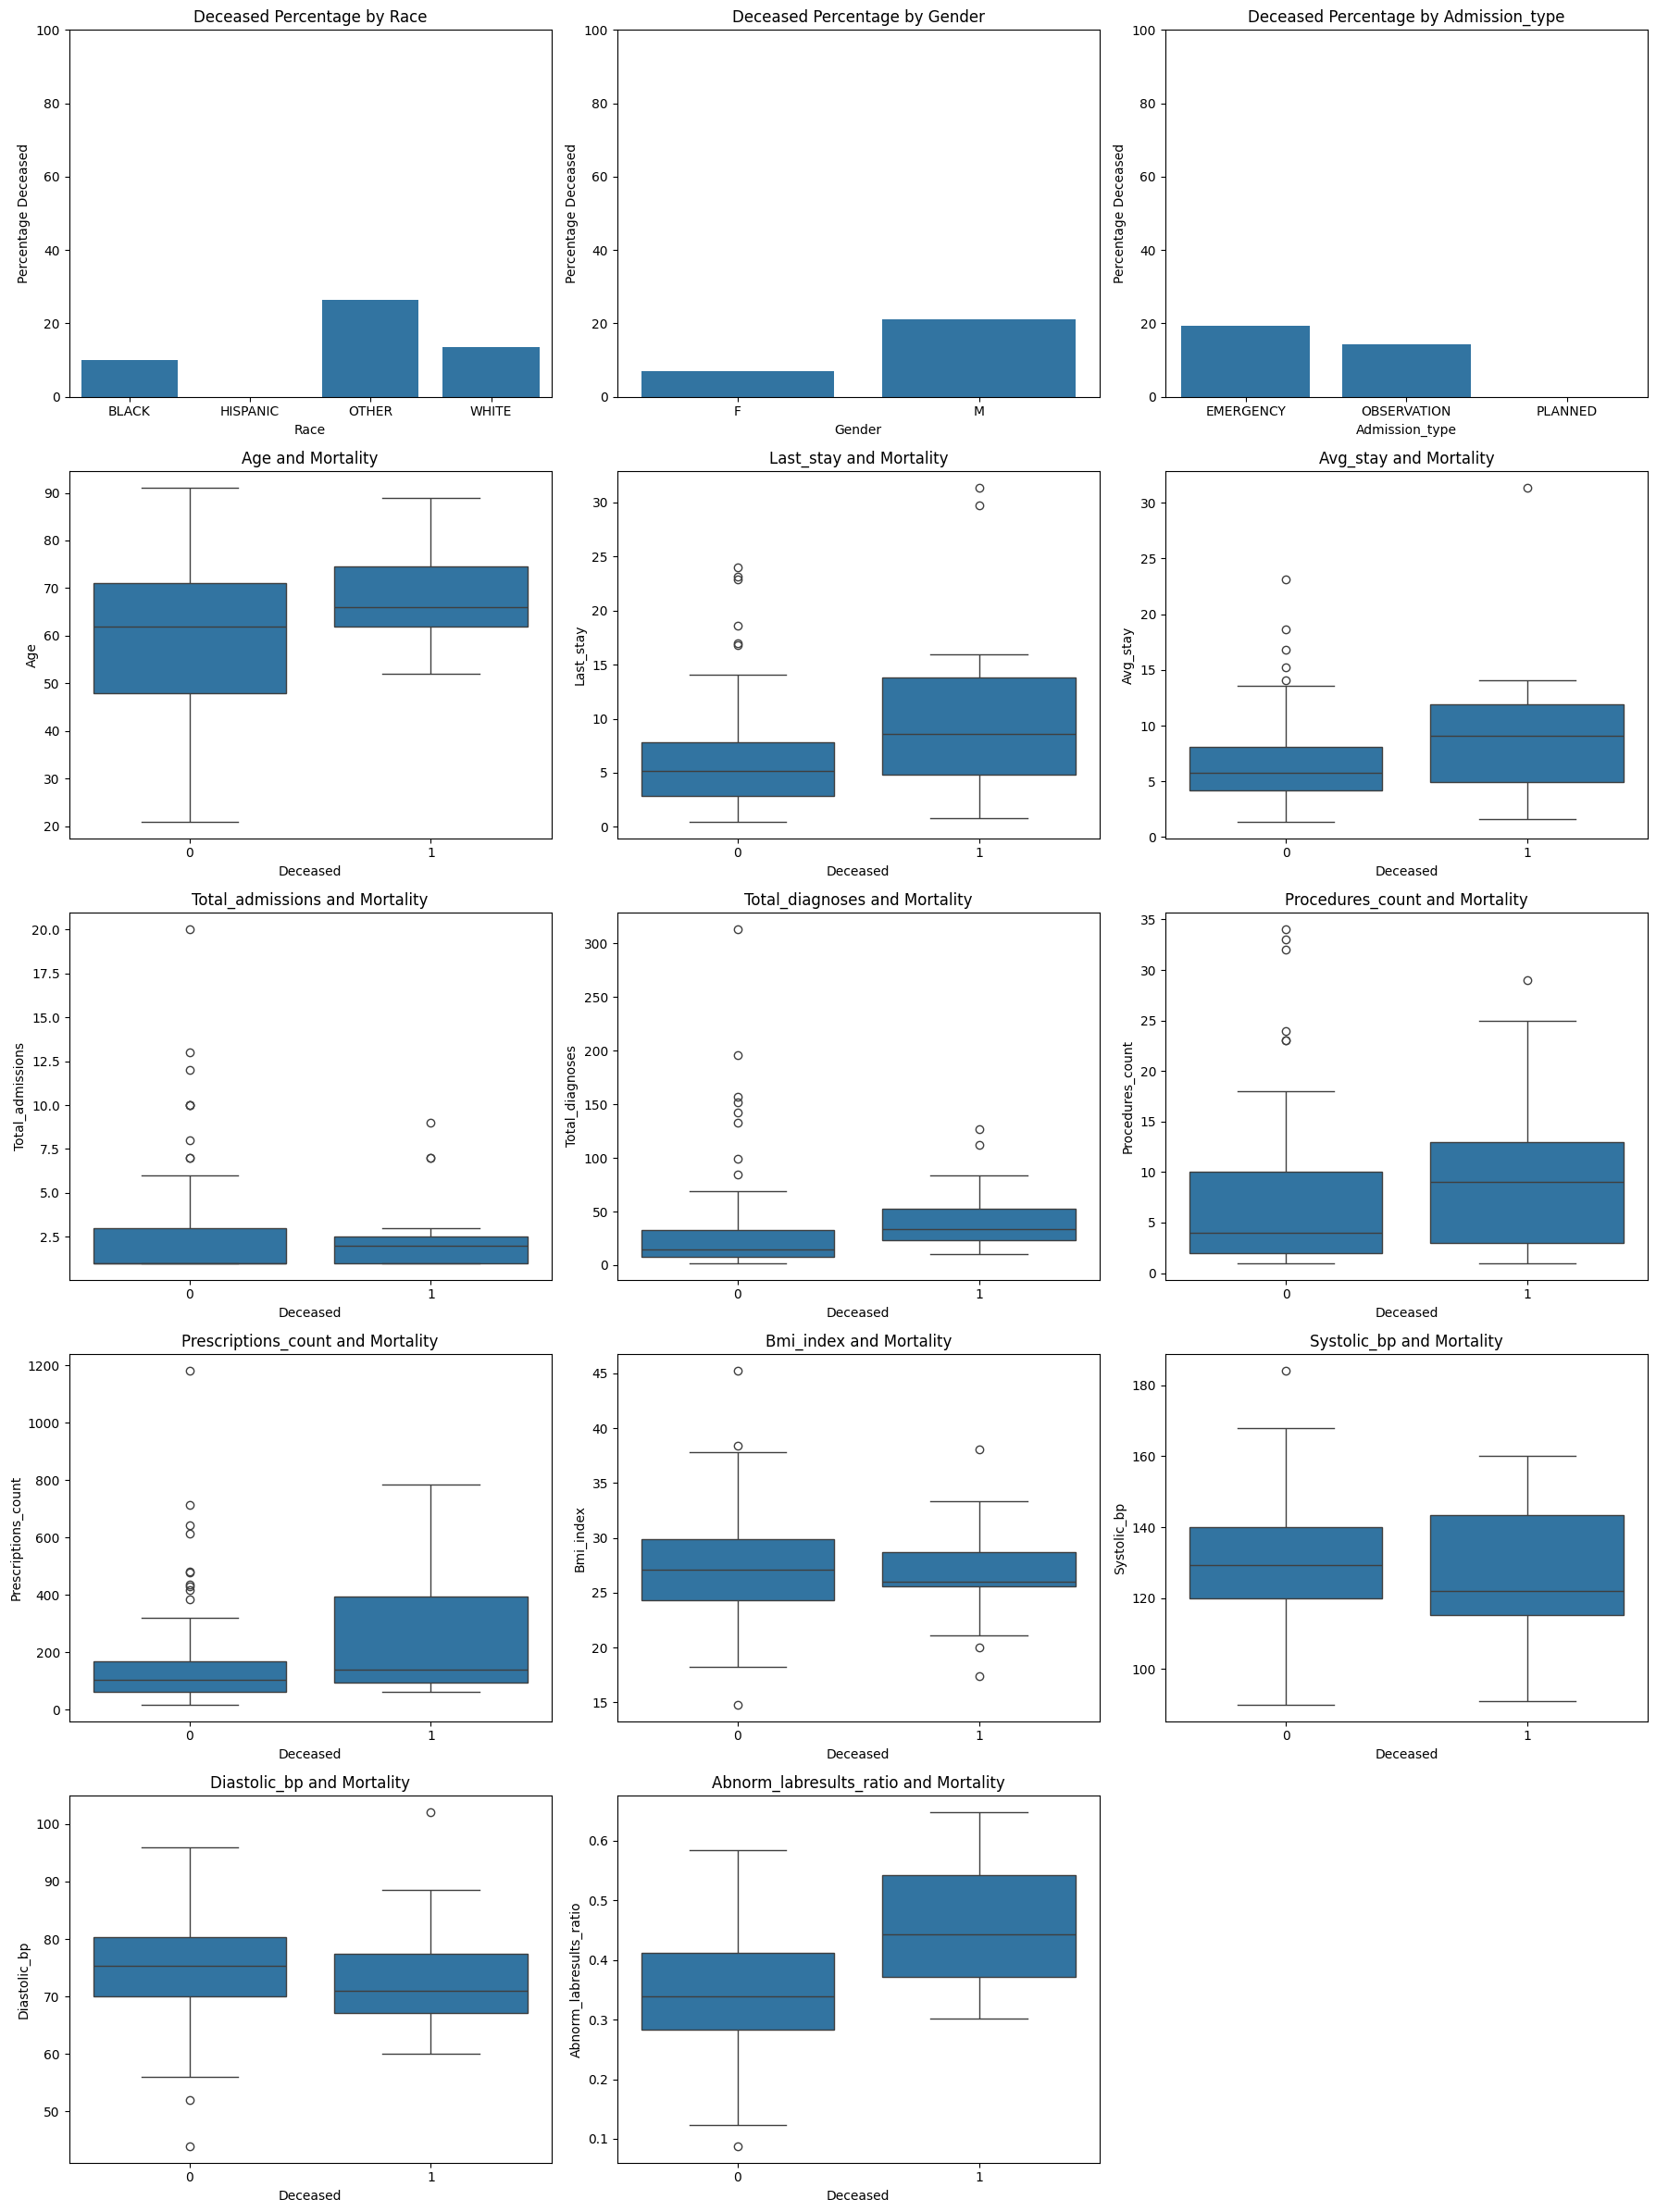

In [66]:
# Define relevant predictor variables (customize based on your dataset)
predictor_vars =['race', 'gender', 'admission_type', 'age', 'last_stay', 'avg_stay', 'total_admissions', 'total_diagnoses', 'procedures_count', 
                 'prescriptions_count', 'bmi_index', 'systolic_bp', 'diastolic_bp', 'abnorm_labresults_ratio'] 

target_var = 'deceased'
# Set up a figure with subplots (adjust ncols and figsize based on the number of predictor variables)
n_cols = 3  # Number of columns for subplots
fig, axes = plt.subplots(nrows=len(predictor_vars) // n_cols + 1, ncols=n_cols, figsize=(18, 24))

# Iterate over predictor variables and plot relationships with target variable (deceased)
for i, predictor in enumerate(predictor_vars):
    row = i // n_cols
    col = i % n_cols
    
    if predictor in ['gender', 'race', 'admission_type']:  # Plot categorical variables with percentages
        # Calculate percentage of deceased within each category of the predictor
        deceased_percentages = mimic_iv.groupby(predictor)[target_var].mean() * 100
        
        # Plot the percentages using barplot
        sns.barplot(x=deceased_percentages.index, y=deceased_percentages.values, ax=axes[row, col])
        axes[row, col].set_title(f'Deceased Percentage by {predictor.capitalize()}')
        axes[row, col].set_xlabel(predictor.capitalize())
        axes[row, col].set_ylabel('Percentage Deceased')
        axes[row, col].set_ylim(0, 100)  # Set y-axis limit to 0-100
        
    else:  # Plot continuous variables with boxplot
        sns.boxplot(x=target_var, y=predictor, data=mimic_iv, ax=axes[row, col])
        axes[row, col].set_title(f'{predictor.capitalize()} and Mortality')
        axes[row, col].set_xlabel(target_var.capitalize())
        axes[row, col].set_ylabel(predictor.capitalize())

# Hide unused subplots and adjust layout
for ax in axes.flat[len(predictor_vars):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.show()

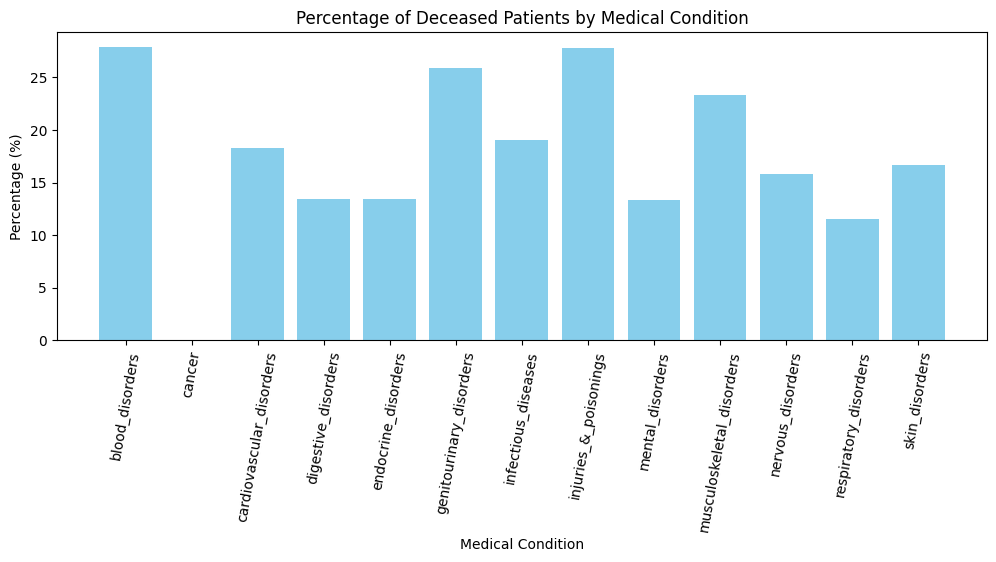

In [69]:
# Define medical conditions columns
medical_conditions_columns = [
    'blood_disorders', 'cancer', 'cardiovascular_disorders', 'digestive_disorders', 
    'endocrine_disorders', 'genitourinary_disorders', 'infectious_diseases', 
    'injuries_&_poisonings', 'mental_disorders', 'musculoskeletal_disorders', 
    'nervous_disorders', 'respiratory_disorders', 'skin_disorders']

# Calculate percentage of deceased patients ('Deceased' = 1) for each medical condition
percentages = []
for condition in medical_conditions_columns:
    deceased_percentage = mimic_iv.groupby(condition)['deceased'].mean().get(1, 0) * 100
    percentages.append(deceased_percentage)

# Plot the percentages as a bar chart
plt.figure(figsize=(12, 4))
plt.bar(medical_conditions_columns, percentages, color='skyblue')
plt.title('Percentage of Deceased Patients by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=80)
plt.show()

#### Demographics of High-Risk Patient Subgroups

Next, let's analyze the demographics of patients who are at high risk of mortality (deceased patients). We will explore distributions of age, gender, and race within this subgroup.


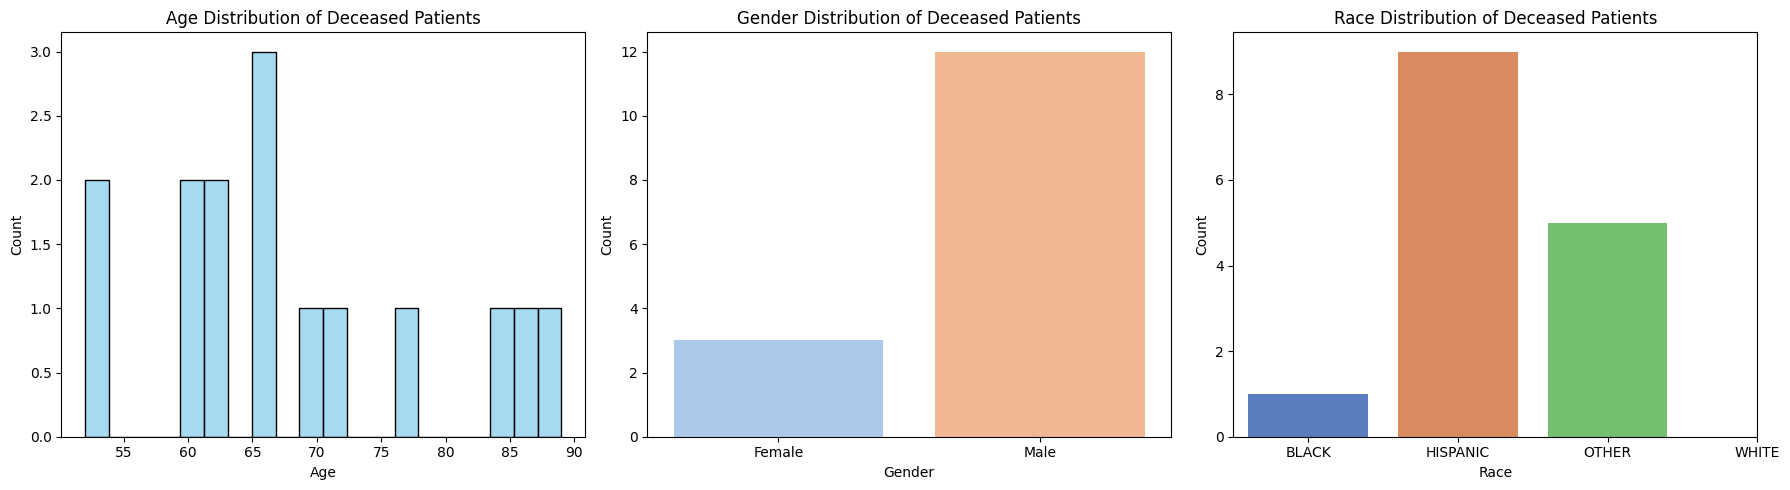

In [121]:
# Filter deceased patients
deceased_patients = mimic_iv[mimic_iv['deceased'] == 1]

# Set up a grid layout for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Age Distribution
sns.histplot(deceased_patients['age'], bins=20, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution of Deceased Patients')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Gender Distribution
sns.countplot(x='gender', data=deceased_patients, palette='pastel', hue='gender', ax=axes[1])
axes[1].set_title('Gender Distribution of Deceased Patients')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Female', 'Male'])

# Plot 3: Race Distribution
sns.countplot(x='race', data=deceased_patients, palette='muted', hue='race', ax=axes[2])
axes[2].set_title('Race Distribution of Deceased Patients')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1, 2, 3])
axes[2].set_xticklabels(['BLACK', 'HISPANIC', 'OTHER', 'WHITE'])

# Adjust layout and spacing
plt.tight_layout()
plt.show()

##### Impact of Abnormal Lab Results on Patient Outcomes

To understand the impact of abnormal lab results on patient outcomes, we'll analyze the distribution of `abnorm_labresults_ratio` among deceased and surviving patients.

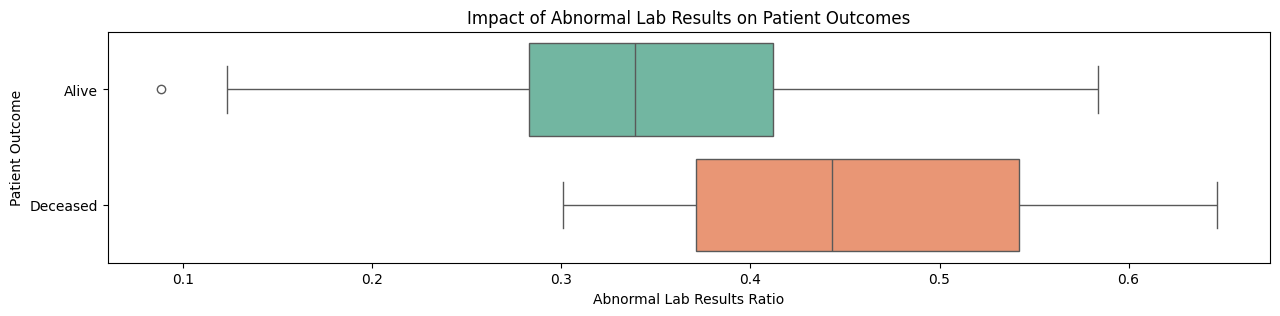

In [138]:
# Plotting the horizontal boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(y='deceased', x='abnorm_labresults_ratio', data=mimic_iv, palette='Set2', orient='h')
plt.title('Impact of Abnormal Lab Results on Patient Outcomes')
plt.xlabel('Abnormal Lab Results Ratio')
plt.ylabel('Patient Outcome')
plt.yticks(ticks=[0, 1], labels=['Alive', 'Deceased'])  # Customize y-axis labels
plt.show()

#### 7. Correlations with Mortality

In this section, we will investigate how various features relate to the target variable (1yr_death or deceased). We aim to identify key factors that might influence patient mortality. Let's begin by examining correlations between numerical variables and the target variable (1yr_death). We will use Pearson correlation coefficient to quantify the strength and direction of these relationships.

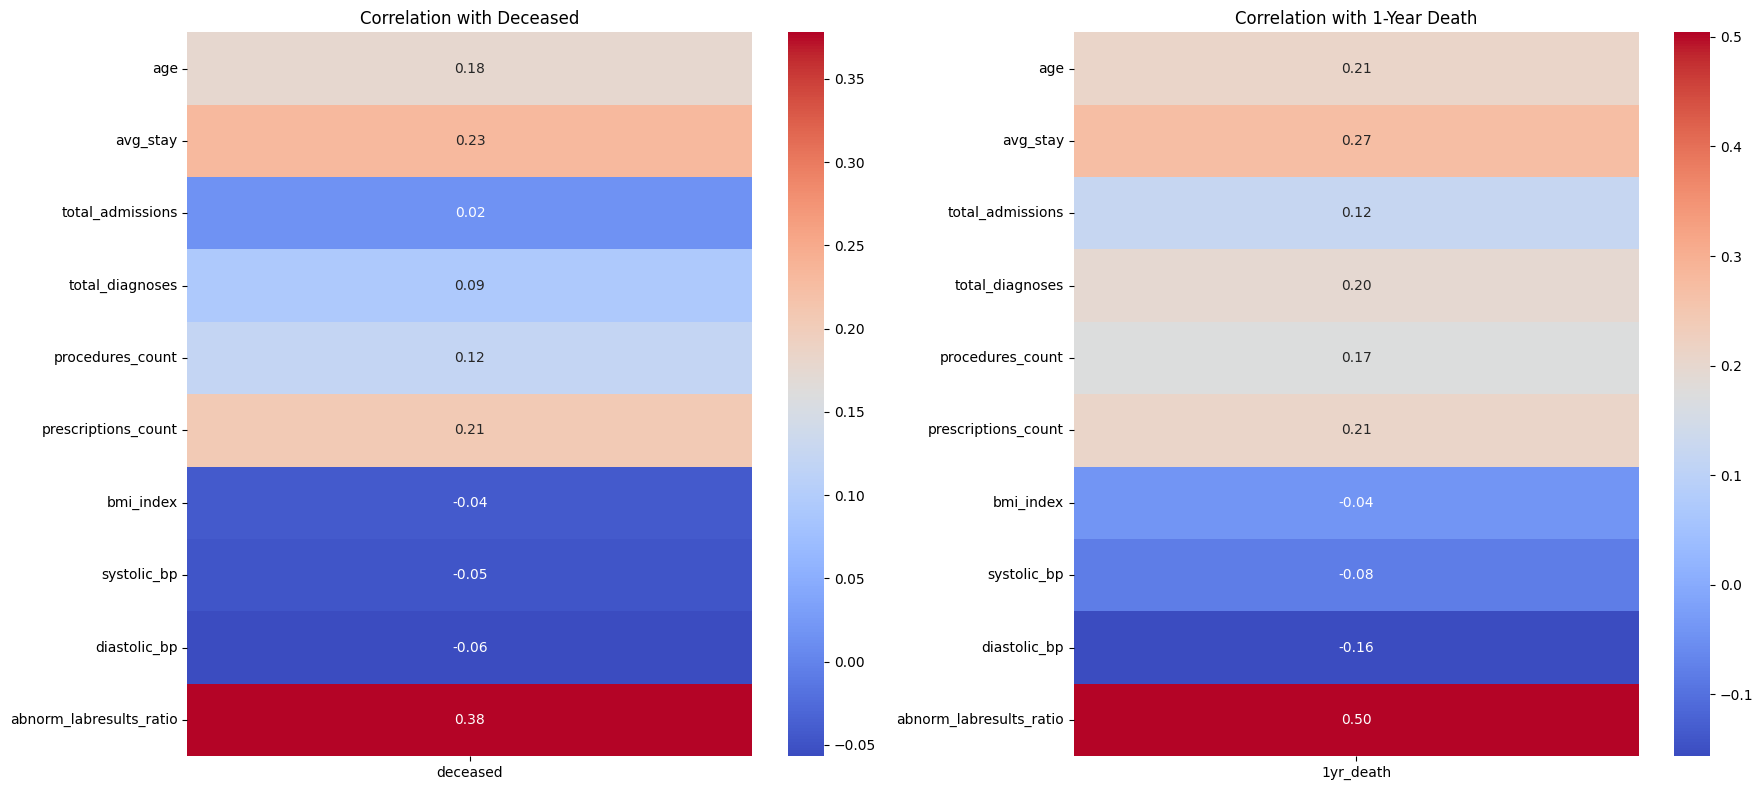

In [140]:
# Select relevant numerical features
numerical_features = ['age', 'avg_stay', 'total_admissions', 'total_diagnoses', 
                      'procedures_count', 'prescriptions_count', 'bmi_index', 
                      'systolic_bp', 'diastolic_bp', 'abnorm_labresults_ratio', 'deceased', '1yr_death']

# Compute correlation matrix
correlation_matrix = mimic_iv[numerical_features].corr()

# Extract correlations with 'deceased' and '1yr_death'
correlation_with_deceased = correlation_matrix['deceased'].drop(['deceased', '1yr_death'])
correlation_with_1yr_death = correlation_matrix['1yr_death'].drop(['deceased', '1yr_death'])

# Set up a grid layout for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot 1: Correlation with 'deceased'
sns.heatmap(correlation_with_deceased.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Correlation with Deceased')

# Plot 2: Correlation with '1yr_death'
sns.heatmap(correlation_with_1yr_death.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Correlation with 1-Year Death')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

#### 8. Additional Exploratory Visualizations

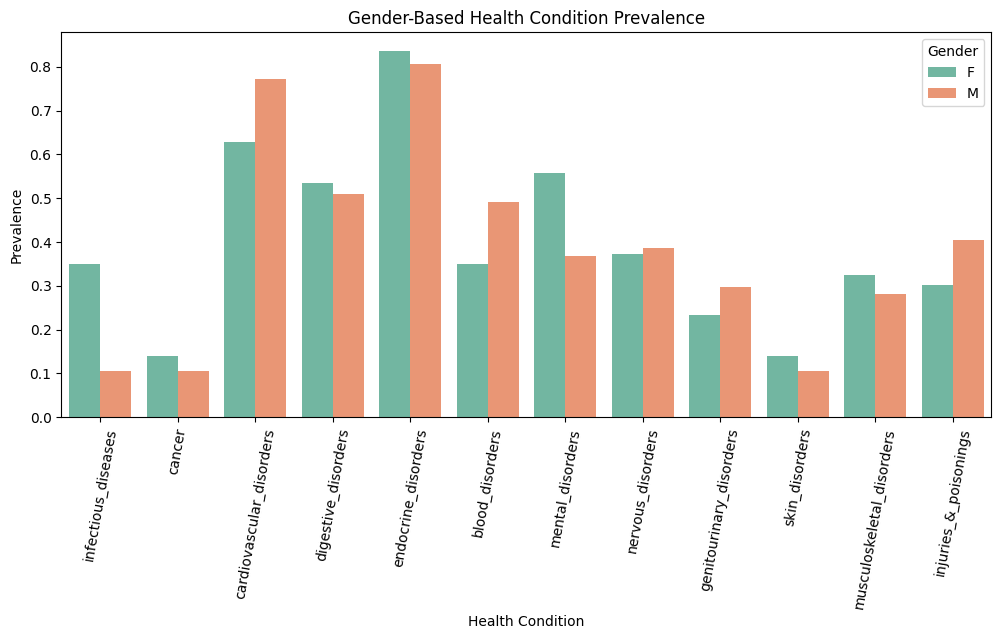

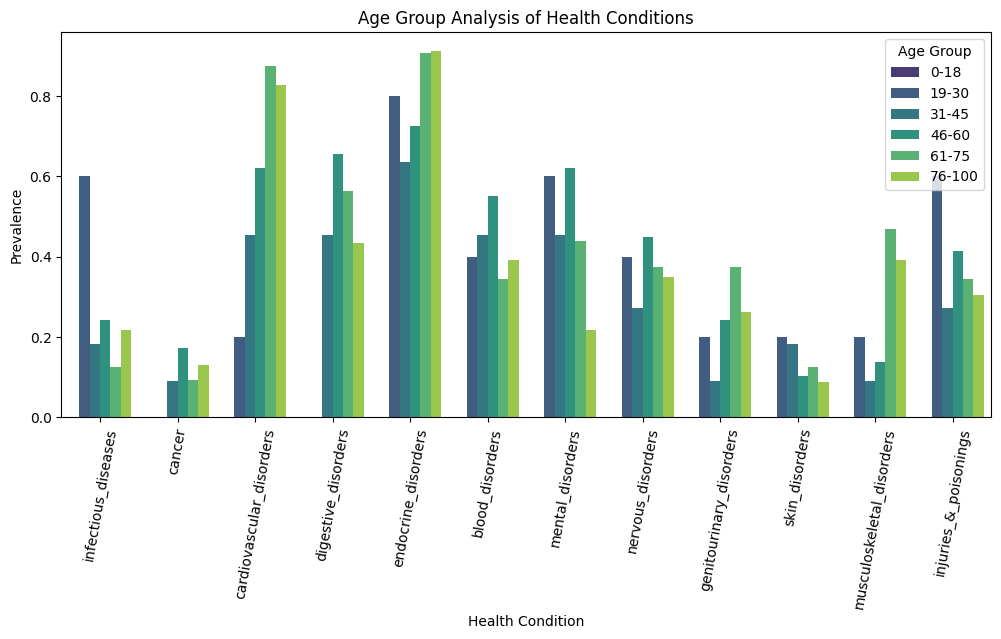

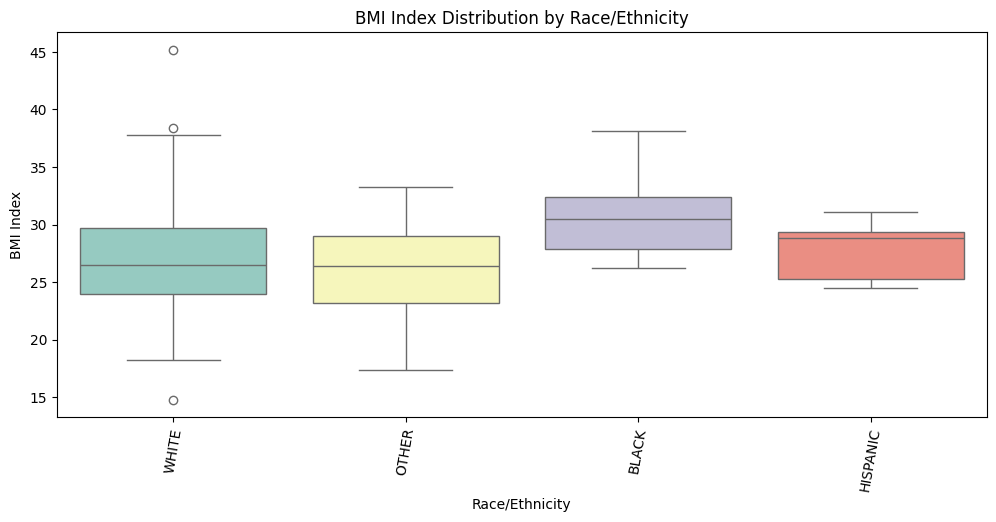

In [149]:
# 8.1 Gender-Based Health Condition Prevalence
health_conditions = ['infectious_diseases', 'cancer', 'cardiovascular_disorders', 
                     'digestive_disorders', 'endocrine_disorders', 'blood_disorders',
                     'mental_disorders', 'nervous_disorders', 'genitourinary_disorders',
                    'skin_disorders', 'musculoskeletal_disorders',
                     'injuries_&_poisonings']

# Group by gender and calculate prevalence of each health condition
gender_health_conditions = mimic_iv.groupby('gender')[health_conditions].mean().reset_index()

# Melt the dataframe to prepare for plotting
gender_health_conditions_melted = gender_health_conditions.melt(id_vars='gender', var_name='Health Condition', value_name='Prevalence')

plt.figure(figsize=(12, 5))
sns.barplot(data=gender_health_conditions_melted, x='Health Condition', y='Prevalence', hue='gender', palette='Set2')
plt.title('Gender-Based Health Condition Prevalence')
plt.xlabel('Health Condition')
plt.ylabel('Prevalence')
plt.xticks(rotation=80)
plt.legend(title='Gender')
plt.show()

# 8.2 Age Group Analysis
# Define age group bins
age_bins = [0, 18, 30, 45, 60, 75, 100]

# Create age groups
mimic_iv['age_group'] = pd.cut(mimic_iv['age'], bins=age_bins, labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76-100'])

# Group by age group and calculate mean of various health conditions
age_group_health_conditions = mimic_iv.groupby('age_group')[health_conditions].mean().reset_index()

# Melt the dataframe to prepare for plotting
age_group_health_conditions_melted = age_group_health_conditions.melt(id_vars='age_group', var_name='Health Condition', value_name='Prevalence')

plt.figure(figsize=(12, 5))
sns.barplot(data=age_group_health_conditions_melted, x='Health Condition', y='Prevalence', hue='age_group', palette='viridis')
plt.title('Age Group Analysis of Health Conditions')
plt.xlabel('Health Condition')
plt.ylabel('Prevalence')
plt.xticks(rotation=80)
plt.legend(title='Age Group')
plt.show()

# 8.3 Race/Ethnicity-Based Trends
# Plotting race/ethnicity-based trends using parallel coordinates or treemaps can be more complex and requires additional libraries

plt.figure(figsize=(12, 5))
sns.boxplot(data=mimic_iv, x='race', y='bmi_index', palette='Set3')
plt.title('BMI Index Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('BMI Index')
plt.xticks(rotation=80)
plt.show()

### Trends & Patterns (preliminary findings)

#### Univariate analysis

##### Numeric Columns Observations:
  
- **`last_stay` and `avg_stay`**:
  - Patients have hospital stays of around 7 days on average, with some experiencing longer stays up to a maximum of ~31 days. We can analyze if the patients with worse outcomes have stays longer than average.

- **`total_admissions`**:
  - Patients in the dataset have an average of ~3 hospital admissions, with a maximum of 20 admissions for a single patient, suggesting recurrent hospitalizations for certain individuals. We can check if those are the ones with worse outcomes.

- **`age`**:
  - Patient population is predominantly elderly, with an average age of ~62, being the age distribution almost symmetric (normal). Half of the patients are aged between 52 and 72, with a particular focus on the 60-70 age group. There was a marked increase in the number of patients aged 40 and over, which suggests that this may be the time when most of the health issues begin to emerge.

- **Other Numeric Features**:
  - Various medical indicators such as `total_diagnoses`, `procedures_count`, and `prescriptions_count` exhibit considerable variability, with large standard deviations suggesting wide-ranging values across patients and therefore diverse medical histories or treatment plans. Justifies checking if a higher count of those is directly connected to mortality.

##### Categorical Columns Observations:
- **`race`**:
  - The most frequent race among patients is `WHITE` (66 out of 100 patients), followed by other racial categories (`BLACK`, `HISPANIC`, `OTHER`, `PORTUGUESE`).
  
- **`gender`**:
  - There are more male patients (`MALE`) than female patients (`FEMALE`), with a count of 57 males out of 100 patients, suggesting a potential gender imbalance in the patient population. 

##### Binary Indicator Columns Observations (History of 10 most recent admissions - patient's diagnosed illnesses at this hospital):
- **Disease Indicators** (`infectious_diseases`, etc.):
  - Highest prevalence of diagnosis: Endocrine disorders (ex: diabetes) (82%); Cardiovascular disorders (71%); digestive disorders (52%). Lowest prevalence of diagnosis: Infectious diseases (21%); skin disorders (12%); cancer (12%).
##### Other Features Observations:
- **Blood Pressure** (`systolic_bp`, `diastolic_bp`):
  - Readings are near or slightly above normal (~120/80 mmHg) for a clinical population. Most of systolic BP values range between 120-140 mmHg with a mean of 129 mmHg. Most diastolic BP values range between 70-80 mmHg with a mean of 75 mmHg. Both data distributions are strongly concentrated around the mean and are almost symmetrical.
- **BMI Index** (`bmi_index`):
  - Aproximately half of the patients fall between values 25-30, a range that is classified as 'Overweight'. Mean and median values are of 27.2 and 26.8 respectively, suggesting an almost symmetrical (normal) distribution. Also, values are strongly concentrated around the mean.
- **Ratio of Abormal Lab Results** (`bmi_index`):
  - We can observe that the range between 30-40% of abnormal laboratory results is the most common among the sample. Also 75% of patients have 30% or more anomalous lab results. Additionally, values are strongly concentrated around the mean (36%) and almost symmetrical.
##### (Target) Mortality Variables Observations:
- **`1yr_death`** and **`deceased`**:
  - A notable portion of patients (31%) experienced death either in the hospital or within 1 year of their last hospital discharge. 15% died at the hospital.

#### Key Findings:
- The dataset represents an aging population with complex medical needs, as evidenced by frequent hospital admissions and a high prevalence of medical conditions.
  
- The predominance of WHITE patients suggests potential demographic biases in the dataset, which may impact generalizability of findings to other racial groups.
  
- The gender imbalance (more males than females) justifies further investigation into potential gender-specific health disparities.
- A large portion of the patients has history of cardiovascular or/and digestive disorders as primary condition while dealing with comorbidities like endocrine disorders (most common is generally diabetes), thus suggesting that those types of illnesses or their interaction can be particularly deadly.
  
- There seems to be a clear link between being overweight/obese and a greater likelihood of being admitted to intensive care.
  
- A considerably high amount of patients have at least 1/3 of their lab results showing anomalies. Considering the nature of the sample, that suggests that such order of values can lead to critical health situations.

- The observed mortality rates highlight the critical nature of the patient sample, suggesting the need for targeted interventions and personalized care approaches.

#### Bivariate analysis (to be continued...)